In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive

'019_Soumyajit Guha.zip (2).zip'     'Adobe-Scan-09-Oct-2023 (1).zip'
'019_SOUMYAJIT GUHA.ZIP(3) (1).zip'   Adobe-Scan-09-Oct-2023.zip
'019_SOUMYAJIT GUHA.ZIP(3).zip'      'Apple Detection'
'019_Soumyajit Guha.zip.zip'	      archive
'20231231_143829 (1).jpg'	     'Colab Notebooks'
 20231231_143829.jpg		      D
'20231231_143838 (1).jpg'	      Eee
 20231231_143838.jpg		      employee_data.gsheet
 20231231_143915.jpg		     'Scan 21 Jul 23 19·46·53-1.PDF'
 20231231_143930.jpg		     'Scan 21 Jul 23 19·46·53.PDF'
 20231231_144001.jpg		      Screenshot_20230528_190123_GPay.jpg
 20231231_144015.jpg		     '_SOUMYAJIT_GUHA (1).pdf'
 20231231_144030.jpg		     'Soumyajit Guha _2354019_ECE.PDF'
 20231231_144040.jpg		      SoumyajitGuha_InternshalaResume-1.pdf
 Adobe-Scan-09-Oct-2023		     'Soumyajit Guha_IT 2354019'
'Adobe-Scan-09-Oct-2023 (1)'	      _SOUMYAJIT_GUHA.pdf
'Adobe-Scan-09-Oct-2023 (1) (1)'     'Untitled folder'


In [ ]:
import os

os.listdir('/content/drive/MyDrive/archive')


['ImageLabels.txt',
 'dataset_labels.csv',
 'stale_orange',
 'fresh_bitter_gourd',
 'stale_tomato',
 'stale_capsicum',
 'stale_banana',
 'fresh_orange',
 'fresh_banana',
 'stale_apple',
 'fresh_apple',
 'fresh_capsicum',
 'stale_bitter_gourd',
 'fresh_tomato']

In [ ]:
import os
import random
import shutil

# Paths
image_root = '/content/drive/MyDrive/archive'        # your main dataset folder with class subfolders
dataset_root = '/content/dataset' # New root for the split dataset

# Split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create train, val, test folders in the new dataset root
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(dataset_root, split), exist_ok=True)

# Process each class folder
for class_name in os.listdir(image_root):
    class_path = os.path.join(image_root, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    random.shuffle(images)

    n = len(images)
    train_end = int(train_ratio * n)
    val_end = train_end + int(val_ratio * n)

    splits = {
        'train': images[:train_end],
        'val': images[train_end:val_end],
        'test': images[val_end:]
    }

    for split, split_images in splits.items():
        for img_file in split_images:
            src_img_path = os.path.join(class_path, img_file)
            dest_img_path = os.path.join(dataset_root, split, class_name, img_file)
            os.makedirs(os.path.dirname(dest_img_path), exist_ok=True)
            shutil.copy(src_img_path, dest_img_path)

print(os.listdir(os.path.join(dataset_root, 'train')))  # should show all classes
print(os.listdir(os.path.join(dataset_root, 'val')))
print(os.listdir(os.path.join(dataset_root, 'test')))

['stale_bitter_gourd', 'stale_orange', 'stale_tomato', 'fresh_orange', 'stale_apple', 'fresh_apple', 'fresh_capsicum', 'stale_capsicum', 'fresh_tomato', 'fresh_bitter_gourd', 'fresh_banana', 'stale_banana']
['stale_bitter_gourd', 'stale_orange', 'stale_tomato', 'fresh_orange', 'stale_apple', 'fresh_apple', 'fresh_capsicum', 'stale_capsicum', 'fresh_tomato', 'fresh_bitter_gourd', 'fresh_banana', 'stale_banana']
['stale_bitter_gourd', 'stale_orange', 'stale_tomato', 'fresh_orange', 'stale_apple', 'fresh_apple', 'fresh_capsicum', 'stale_capsicum', 'fresh_tomato', 'fresh_bitter_gourd', 'fresh_banana', 'stale_banana']


In [ ]:
# Install required library
!pip install pillow --quiet


In [ ]:
import os
from PIL import Image
import shutil

# Source images
dataset_root = '/content/dataset'           # actual images
# Destination labels
label_root = '/content/dataset1_label'      # YOLO labels to generate

# Class to ID mapping
class_map = {
    'fresh_apple': 0, 'stale_apple': 1,
    'fresh_banana': 2, 'stale_banana': 3,
    'fresh_capsicum': 4, 'stale_capsicum': 5,
    'fresh_tomato': 6, 'stale_tomato': 7,
    'fresh_orange': 8, 'stale_orange': 9,
    'fresh_bitter_gourd': 10, 'stale_bitter_gourd': 11
}

# Loop through splits
for split in ['train', 'val', 'test']:
    split_src = os.path.join(dataset_root, split)
    split_lbl = os.path.join(label_root, split)

    for class_name in os.listdir(split_src):
        src_class_path = os.path.join(split_src, class_name)
        lbl_class_path = os.path.join(split_lbl, class_name)
        if not os.path.isdir(src_class_path):
            continue

        # Make sure label folder exists
        os.makedirs(lbl_class_path, exist_ok=True)

        # Process each image
        for img_file in os.listdir(src_class_path):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            img_path = os.path.join(src_class_path, img_file)
            try:
                img = Image.open(img_path)
                img_w, img_h = img.size

                # YOLO label: full image bounding box
                class_id = class_map[class_name]
                x_center, y_center = 0.5, 0.5
                w_norm, h_norm = 1.0, 1.0

                # Save .txt to dataset1_label
                txt_file = os.path.join(lbl_class_path, img_file.rsplit('.', 1)[0] + '.txt')
                with open(txt_file, 'w') as f:
                    f.write(f"{class_id} {x_center} {y_center} {w_norm} {h_norm}\n")
            except Exception as e:
                print(f"Skipping file {img_path} due to error: {e}")

In [ ]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.0 MB/s eta 0:00:00


In [ ]:
%%writefile /content/data.yaml
train: /content/dataset/train
val: /content/dataset/val
test: /content/dataset/test

nc: 13  # 12 fruits + 1 out_of_bound
names: [
  'fresh_apple',
  'stale_apple',
  'fresh_banana',
  'stale_banana',
  'fresh_capsicum',
  'stale_capsicum',
  'fresh_tomato',
  'stale_tomato',
  'fresh_orange',
  'stale_orange',
  'fresh_bitter_gourd',
  'stale_bitter_gourd',
  'out_of_bound'
]



Overwriting /content/data.yaml


In [ ]:
import os
import shutil

# Paths
image_base = '/content/dataset'          # images folder
label_base = '/content/dataset1_label'   # labels folder
output_base = '/content/datasets'  # where combined dataset will go

# Create combined folders
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

    # Copy images
    image_split_path = os.path.join(image_base, split)
    for file in os.listdir(image_split_path):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            shutil.copy(os.path.join(image_split_path, file),
                        os.path.join(output_base, split, file))

    # Copy labels
    label_split_path = os.path.join(label_base, split)
    for file in os.listdir(label_split_path):
        if file.endswith('.txt'):
            shutil.copy(os.path.join(label_split_path, file),
                        os.path.join(output_base, split, file))

print("Dataset combined successfully!")


Dataset combined successfully!


In [ ]:
import os
import shutil

# Paths
image_base = '/content/dataset'          # folder containing images with class subfolders
label_base = '/content/dataset1_label'   # folder containing txt labels with same class subfolders
output_base = '/content/datasets'        # final YOLO-ready folder

splits = ['train', 'val', 'test']

for split in splits:
    out_split = os.path.join(output_base, split)
    os.makedirs(out_split, exist_ok=True)

    # Process images
    img_split_path = os.path.join(image_base, split)
    for class_folder in os.listdir(img_split_path):
        class_folder_path = os.path.join(img_split_path, class_folder)
        if os.path.isdir(class_folder_path):
            for file in os.listdir(class_folder_path):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    shutil.copy(os.path.join(class_folder_path, file), out_split)

    # Process labels
    label_split_path = os.path.join(label_base, split)
    for class_folder in os.listdir(label_split_path):
        class_folder_path = os.path.join(label_split_path, class_folder)
        if os.path.isdir(class_folder_path):
            for file in os.listdir(class_folder_path):
                if file.endswith('.txt'):
                    shutil.copy(os.path.join(class_folder_path, file), out_split)

print("✅ All images and labels flattened and ready in /content/datasets/")


✅ All images and labels flattened and ready in /content/datasets/



image 1/1 /content/datasets/val/Copy of IMG_20200729_164206.jpg_0_8542.jpg: 512x512 (no detections), 8.0ms
Speed: 1.2ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)
Results saved to /content/runs/detect/predict3


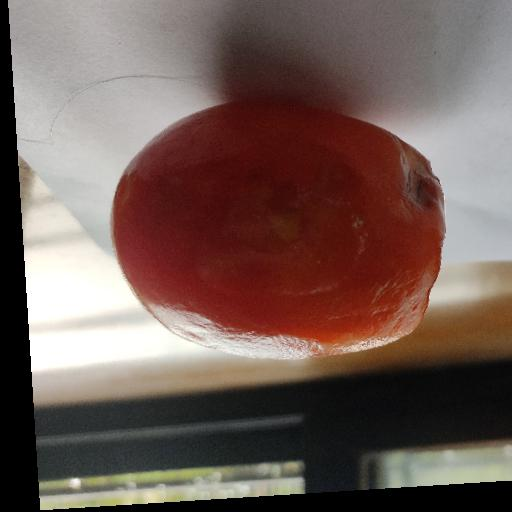

In [ ]:
from ultralytics import YOLO
model=YOLO('/content/runs/detect/fruit_with_oob/weights/best.pt')
results=model.predict(
    source='/content/datasets/val/Copy of IMG_20200729_164206.jpg_0_8542.jpg',
    imgsz=512,
    conf=0.25,
    save=True
)
results[0].show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

image 1/1 /content/drive/MyDrive/Apple Detection/green.jpg: 416x512 2 fresh_apples, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 512)


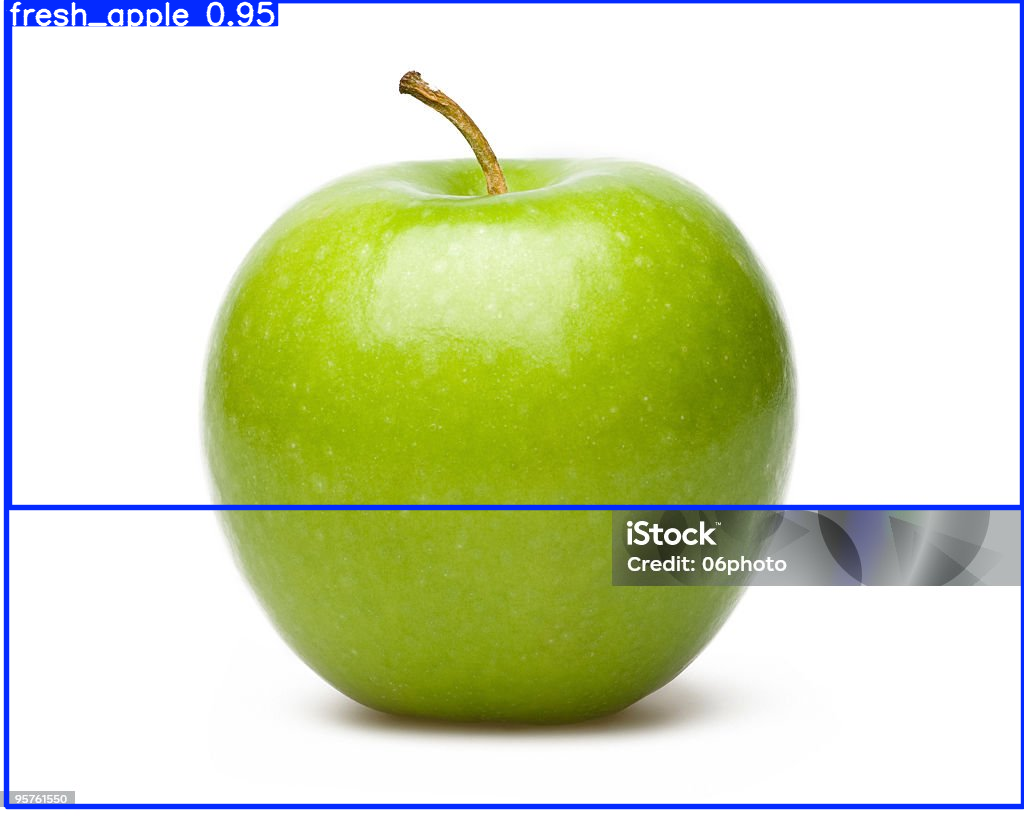

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # mounts your Google Drive

from ultralytics import YOLO

model = YOLO('/content/runs/detect/fruits_detection/weights/best.pt')

results = model.predict(
    source='/content/drive/MyDrive/Apple Detection/green.jpg'
)
results[0].show()
